In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(0)

## Loading the Data

In [2]:
raw_train_data = pd.read_csv('../input/train.csv')
raw_train_data.shape

(42000, 785)

In [3]:
images = raw_train_data.iloc[:, 1:]
labels = raw_train_data.iloc[:, 0]

In [4]:
from sklearn.model_selection import train_test_split
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2)

## Viewing an Image

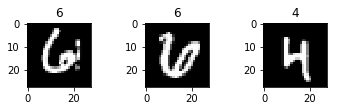

In [5]:
for i in range(3):
  plt.subplot(3, 3, 1 + i)
  plt.imshow(train_images.iloc[i].as_matrix().reshape((28, 28)), cmap='gray')
  plt.title(train_labels.iloc[i])

## Scaling the Data

In [6]:
train_images /= 255
val_images /= 255

## Training the Model

In [7]:
from sklearn import svm
classifier = svm.SVC(C=7, gamma=0.009)
classifier.fit(train_images, train_labels)

SVC(C=7, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.009, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
classifier.score(val_images, val_labels)

0.97845238095238096

## Labelling the Test Data

In [9]:
test_images = pd.read_csv('../input/test.csv')
test_images /= 255

In [10]:
predictions = classifier.predict(test_images)

## Saving the Results

In [11]:
df = pd.DataFrame(predictions)
df.index += 1
df.index.name = 'ImageId'
df.columns = ['Label']
df.to_csv('results.csv')